# Import Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
X, target = datasets.load_iris(return_X_y=True, as_frame=True)
X["target"] = target
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
## We will choose just two targets so we can make the binary Log Reg
X = X.query("target != 2")
y = X.target
X = X.drop("target", axis=1)

# Modelisation

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1
)

In [5]:
def initialize_weights(nb_features):
    # +1 so we can add the intercept too
    w = np.zeros(nb_features)
    w0 = 0
    return w.transpose(), w0

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def predict(features, w, w0):
    z = np.dot(features, w) + w0
    return sigmoid(z).flatten()

In [8]:
def loss_function(y_hat, target):
    vec = -np.dot(target, np.log(y_hat)) - np.dot((1 - target), np.log(1 - y_hat))
    nbr = len(target)
    return vec.sum() / nbr

In [9]:
def update_weights(features, pred, target, w, w0, lr=0.01):
    # lr is the learning rate
    nb_obs = len(features)
    w = w - lr * np.dot((pred - np.array(target)).T, features) / nb_obs
    w0 = w0 - lr * ((pred - np.array(target)).sum()) / nb_obs
    return w, w0

In [10]:
def train_model(features, target, nb_epochs, lr=0.01):
    losses = []
    w, w0 = initialize_weights(features.shape[1])
    for i in range(nb_epochs):
        probs = predict(features, w, w0)
        losses.append(loss_function(probs, y_train))
        w, w0 = update_weights(features, probs, target, w, lr)
    return w, w0, probs, losses

In [11]:
weights, intercept, probs, losses = train_model(X_train, y_train, 1000, 0.01)

In [12]:
def predict_classes(probs, threshold=0.5):
    return (probs > threshold).astype(int)

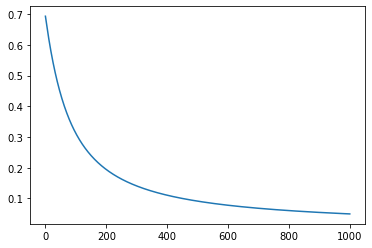

In [13]:
plt.plot(losses)

In [14]:
print("Accuracy on training set: ", accuracy_score(predict_classes(probs), y_train))
print(
    "Accuracy on testing set: ",
    accuracy_score(predict_classes(predict(X_test, weights, intercept)), y_test),
)
print("Weights are: ", weights)
print("Intercept is: ", intercept)

Accuracy on training set:  1.0
Accuracy on testing set:  1.0
Weights are:  [ 0.74447768 -0.78223486  1.12325086  1.14782857]
Intercept is:  0.010013069673248422


# With Sklearn

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
print("Accuracy on training set: ", model.score(X_train, y_train))
print("Accuracy on testing set: ", model.score(X_test, y_test))
print("Weights are: ", model.coef_)
print("Intercept is: ", model.intercept_)

Accuracy on training set:  1.0
Accuracy on testing set:  1.0
Weights are:  [[ 0.76230263 -1.00076236  1.39688541  1.46344901]]
Intercept is:  [0.05934914]
